In [64]:
'''
Feature Extraction
'''
import pandas as pd
import statsmodels.api as sm
import datetime
df = pd.read_csv("dataset/train.csv", sep=',', parse_dates=[2])

df = df[df['Store'] == 1.0][df['Date']>datetime.date(2013,1,6)].sort_values(by='Date')
df = df[df['DayOfWeek'] != 7]

df['SalesMinus1'] = df['Sales'].shift(1)
df['SalesMinus2'] = df['Sales'].shift(2)
df['CustomersMinus1'] = df['Customers'].shift(1)
df['CustomersMinus2'] = df['Customers'].shift(2)
df = df.dropna()
df = df.drop('Customers', axis = 1)
df = pd.get_dummies(df, columns=['DayOfWeek'])
df.head(10)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Store,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,SalesMinus1,SalesMinus2,CustomersMinus1,CustomersMinus2,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6
1007175,1,2013-01-09,5471,1,1,0,1,5580.0,7176.0,654.0,785.0,0,0,1,0,0,0
1006060,1,2013-01-10,4892,1,1,0,1,5471.0,5580.0,626.0,654.0,0,0,0,1,0,0
1004945,1,2013-01-11,4881,1,1,0,1,4892.0,5471.0,615.0,626.0,0,0,0,0,1,0
1003830,1,2013-01-12,4952,1,0,0,0,4881.0,4892.0,592.0,615.0,0,0,0,0,0,1
1001600,1,2013-01-14,4717,1,0,0,0,4952.0,4881.0,646.0,592.0,1,0,0,0,0,0
1000485,1,2013-01-15,3900,1,0,0,0,4717.0,4952.0,616.0,646.0,0,1,0,0,0,0
999370,1,2013-01-16,4008,1,0,0,0,3900.0,4717.0,512.0,616.0,0,0,1,0,0,0
998255,1,2013-01-17,4044,1,0,0,0,4008.0,3900.0,530.0,512.0,0,0,0,1,0,0
997140,1,2013-01-18,4127,1,0,0,0,4044.0,4008.0,503.0,530.0,0,0,0,0,1,0
996025,1,2013-01-19,5182,1,0,0,0,4127.0,4044.0,568.0,503.0,0,0,0,0,0,1


In [65]:
'''
Model Preperation
'''
import numpy as np
from sklearn.model_selection import train_test_split
labels = np.array(df['Sales'])
df_nosales = df.drop('Sales', axis = 1).drop('Date', axis = 1).drop('StateHoliday', axis = 1)
feature_list = list(df_nosales.columns)
np_data = np.array(df_nosales)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(np_data, labels, test_size = 0.25, random_state = 42)

In [66]:
'''
Training
'''
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 10)

rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Mean Absolute Error: 436.46 degrees.
Accuracy: 91.18 %.


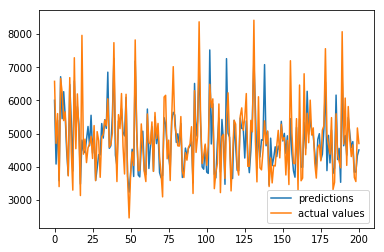

In [67]:
'''
Prediction
'''
from matplotlib import pyplot as plt

predictions = rf.predict(test_features)
# Fix for divide by 0 problem.
test_labels[test_labels == 0] = np.mean(test_labels)
predictions[predictions == 0] = np.mean(predictions)

errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
plt.plot(range(0, len(predictions)), predictions, label='predictions')
plt.plot(range(0, len(test_labels)), test_labels, label='actual values')
plt.legend()

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

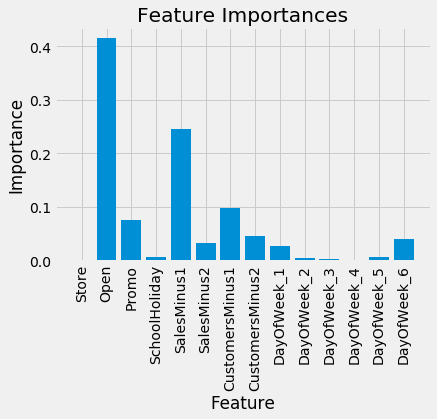

In [70]:
importances = list(rf.feature_importances_)
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

In [62]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')